<a href="https://colab.research.google.com/github/CansecoSergio/python-data-science/blob/main/Solucion_Reto_M8_Sergio_Canseco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto Sergio Canseco M8

**Importación de librerias**



In [383]:
# Librería de análisis y manipulación de datos
import numpy as np
import pandas as pd

# Librería de gráficas
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

**Obtención del dataframe de los datos**

In [384]:
data = pd.read_csv('/content/drive/MyDrive/Archivos Collab/M8/Employee_Attrition_datos_reto_binario.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Análisis de la información**

In [385]:
# Obtención de la cantidad de registros y columnas
data.shape

(1470, 35)

In [386]:
# Cantidad de variables y su tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [387]:
# Detección de valores perdidos
data.isna().sum()

# Se observa que no hay valores perdidos

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [388]:
# Determinar la cantidad de datos distintos en cada columna
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [389]:
# Estadísticas de los atributos numéricos
data.describe()

# Todos los atributos tienen información completa
# EmployeeCount es una valor unico en todos los registros
# StandardHours es un valor unico para todos los registros
# EmplyeeNumber es un valor unico para todos los registros

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [390]:
# Estadísticas de los atributos string
data.describe(include=['O'])

# Todos los empleados son de más de 18 años
# Todos los atributos tienen información completa
# Todos los atributos son variables categóricas

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Mediana= 36.0


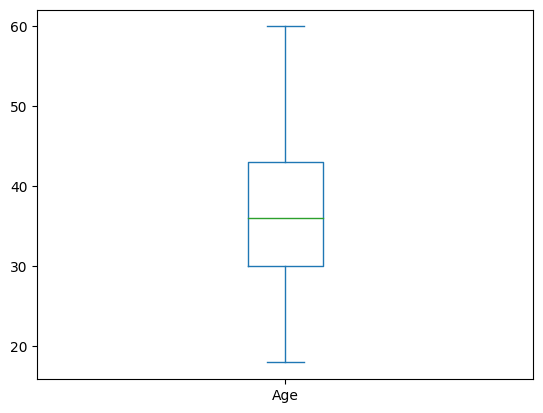

In [391]:
# Para este caso solo ilustra los datos de edad con un gráfico de caja
data['Age'].plot(kind='box')
print("Mediana=", data['Age'].median())

**Considero que las siguiente variables pueden ser eliminadas:**

1.- EmployeeCount: Únicamente tiene el valor 1 para todos los registros y no expresa información reelevante con la deserción.

2.- EmployeeNumber: Porque es un identificador único y no está ligado a alguna otra característica.

3.- Over18: Es información reelevante ya que todos los empleados son mayores de edad.

4.- StandardHours: Únicamente tiene el valor 80 para todos los registros y no expresa información reelevante con la deserción.                         

**Eliminación de columnas irrelevantes.**

In [392]:
# Se eliminan las columnas descritas
data.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'], inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


**Las siguientes columnas categorícas son transformadas a númericas para continuar con el procedimiento:**

Attrition

*   BusinessTravel
*   Department
*   EducationField
*   Gender
*   JobRole
*   MaritalStatus
*   OverTime

In [393]:
# Transformación de variables categorícas a númericas con OrdinalEncoder
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = OrdinalEncoder().fit_transform(data[[col]])

In [394]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


In [395]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [396]:
# Normaliza los datos utilizando el escalador de datos
dataScaler = RobustScaler()
scaler = dataScaler.fit(data)
dataScaled = scaler.transform(data)

# Muestra el arreglo resultante
dataScaled

array([[ 0.38461538,  1.        ,  0.        , ...,  0.2       ,
        -0.33333333,  0.4       ],
       [ 1.        ,  0.        , -1.        , ...,  0.8       ,
         0.        ,  0.8       ],
       [ 0.07692308,  1.        ,  0.        , ..., -0.6       ,
        -0.33333333, -0.6       ],
       ...,
       [-0.69230769,  0.        ,  0.        , ..., -0.2       ,
        -0.33333333,  0.        ],
       [ 1.        ,  0.        , -1.        , ...,  0.6       ,
        -0.33333333,  1.        ],
       [-0.15384615,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.2       ]])

In [397]:
# Crea un dataframe con los datos normalizados
data_f = pd.DataFrame(dataScaled)
data_f.columns = data.columns

# muestra las primeras 5 líneas del dataframe resultante
data_f.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.384615,1.0,0.0,0.433526,1.0,-0.500000,-0.5,-0.5,-0.5,-1.0,...,0.0,-1.0,-1.0,-0.222222,-3.0,-2.0,0.166667,0.2,-0.333333,0.4
1,1.000000,0.0,-1.0,-0.755780,0.0,0.083333,-1.0,-0.5,0.0,0.0,...,1.0,0.5,0.0,0.000000,0.0,0.0,0.833333,0.8,0.000000,0.8
2,0.076923,1.0,0.0,0.825145,0.0,-0.416667,-0.5,1.0,0.5,0.0,...,0.0,-0.5,-1.0,-0.333333,0.0,0.0,-0.833333,-0.6,-0.333333,-0.6
3,-0.230769,0.0,-1.0,0.852601,0.0,-0.333333,0.5,-0.5,0.5,-1.0,...,0.0,0.0,-1.0,-0.222222,0.0,0.0,0.500000,0.8,0.666667,-0.6
4,-0.692308,0.0,0.0,-0.304913,0.0,-0.416667,-1.0,0.5,-1.0,0.0,...,0.0,0.5,0.0,-0.444444,0.0,0.0,-0.500000,-0.2,0.333333,-0.2


In [398]:
# Muestra la información condensada del dataframe
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   float64
 12  JobLevel                  1470 non-null   float64
 13  JobRole                   1470 non-null   float64
 14  JobSatis

In [399]:
data_f.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,0.071062,0.702721,-1.384615,-0.461538,0.0,0.538462,1.846154
Attrition,1470.0,0.161224,0.367863,0.000000,0.000000,0.0,0.000000,1.000000
BusinessTravel,1470.0,-0.392517,0.665455,-2.000000,-1.000000,0.0,0.000000,0.000000
DailyRate,1470.0,0.000702,0.583106,-1.011561,-0.486994,0.0,0.513006,1.007225
Department,1470.0,0.260544,0.527792,-1.000000,0.000000,0.0,1.000000,1.000000
DistanceFromHome,1470.0,0.182710,0.675572,-0.500000,-0.416667,0.0,0.583333,1.833333
Education,1470.0,-0.043537,0.512082,-1.000000,-0.500000,0.0,0.500000,1.000000
EducationField,1470.0,0.123810,0.665685,-1.000000,-0.500000,0.0,0.500000,1.500000
EnvironmentSatisfaction,1470.0,-0.139116,0.546541,-1.000000,-0.500000,0.0,0.500000,0.500000
Gender,1470.0,-0.400000,0.490065,-1.000000,-1.000000,0.0,0.000000,0.000000


**Creación de conjuntos de entrenamiento y prueba**

In [400]:
# dividir el conjunto de datos en los conjuntos de entrenamiento(60%), validación (20%) y prueba (20%)

train_val_df, test_df = train_test_split(data_f, test_size=0.2, random_state=23)
train_df, validation_df = train_test_split(train_val_df, test_size=0.25, random_state=23)

X_train, y_train = train_df.drop(columns=["Attrition"], axis=1), train_df["Attrition"]
X_validation, y_validation = validation_df.drop(columns=["Attrition"], axis=1), validation_df["Attrition"]
X_test, y_test = test_df.drop(columns=["Attrition"], axis=1), test_df["Attrition"]

# muestra la forma de los distintos conjuntos de datos obtenidos
print("Datos de entrenamiento=", X_train.shape, y_train.shape)
print("Datos de validación=", X_validation.shape, y_validation.shape)
print("Datos de prueba=", X_test.shape, y_test.shape)
data_f.shape

Datos de entrenamiento= (882, 30) (882,)
Datos de validación= (294, 30) (294,)
Datos de prueba= (294, 30) (294,)


(1470, 31)

# **Bosques Aleatorios**

Si no se pasan valores a los hiperparámetros y se dejan como hiperparámetros por omisión el train_score tiene valor a 1 y es un overfitting

In [401]:
# Utitliza los hiperparámetros por omisión
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rfcInicial_model = RandomForestClassifier()
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# Despliega los score promedio de entrenamiento y validación, así como los resultados obtenidos para cada uno de los 10 folds
print("Score promedio de entrenamiento = ", scores['train_score'].mean())
print("Score promedio de validación = ", scores['test_score'].mean())
scores

Score promedio de entrenamiento =  1.0
Score promedio de validación =  0.8526046986721143


,fit_time,score_time,test_score,train_score
0,0.300688,0.011333,0.853933,1.0
1,0.256846,0.008928,0.853933,1.0
2,0.259165,0.014243,0.840909,1.0
3,0.261535,0.008535,0.840909,1.0
4,0.243136,0.008349,0.852273,1.0
5,0.246098,0.008411,0.875000,1.0
6,0.252860,0.008740,0.840909,1.0
7,0.240725,0.008643,0.840909,1.0
8,0.245353,0.009484,0.863636,1.0
9,0.239975,0.008304,0.863636,1.0


Exactitud de validacion= 0.8639455782312925
Exactitud de test= 0.8503401360544217
-----------
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       246
         1.0       0.75      0.12      0.21        48

    accuracy                           0.85       294
   macro avg       0.80      0.56      0.57       294
weighted avg       0.84      0.85      0.80       294



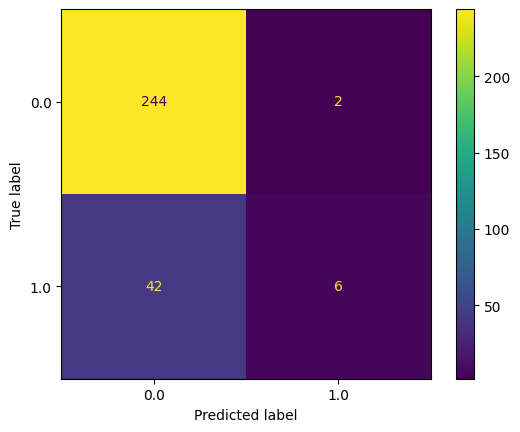

In [402]:
# Calcula las matriz de confusión y las métricas de evaluación con el conjunto de prueba
rfcInicial_model.fit(X_train, y_train) # No se ha entrenado el modelo
print("Exactitud de validacion=",rfcInicial_model.score(X_validation, y_validation))
print("Exactitud de test=",rfcInicial_model.score(X_test, y_test))
print("-----------")

ConfusionMatrixDisplay.from_estimator(rfcInicial_model, X_test, y_test)
print(classification_report(y_test, rfcInicial_model.predict(X_test)))

In [403]:
# Determina, entre algunas alternativas, los mejores valores de hiperparámetros
parameters = {'max_depth': [2, 3, 5, 7],
              'max_features': ['sqrt', 'log2', None],
              'n_estimators': [10, 30, 60, 100]}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters,
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

# Despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n",rfc_grid.best_params_)

Mejores hiperparámetros
 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 60}


In [404]:
# Resultado del Bosque Aleatorio con los mejores hiperparámetros encontrados para la informacion de test
rfc_model = rfc_grid.best_estimator_
print("Exactitud de entrenamiento=",rfc_model.score(X_train, y_train))
print("Exactitud de validacion=",rfc_model.score(X_validation, y_validation))
print("Exactitud de test=",rfc_model.score(X_test, y_test))

Exactitud de entrenamiento= 0.935374149659864
Exactitud de validacion= 0.8571428571428571
Exactitud de test= 0.8503401360544217


**Se concluye que se obtienen los mismos resultados con los hiperparámetros por omisión y con los mejores hiperparámetros para el conjunto de test.**

Adicionalmente, con los hiperparámetros por omisión en el conjunto train se obtiene un overfitting y con los hiperparámetros no.


# **Regresión Logística**

In [405]:
# Utitliza los hiperparámetros por omisión
from sklearn.linear_model import LogisticRegression

lrcInicial_model = LogisticRegression()
scores = pd.DataFrame(cross_validate(lrcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# Despliega los score promedio de entrenamiento y validación, así como los resultados obtenidos para cada uno de los 10 folds
print("Score promedio de entrenamiento = ", scores['train_score'].mean())
print("Score promedio de validación = ", scores['test_score'].mean())
scores

Score promedio de entrenamiento =  0.8830945203782468
Score promedio de validación =  0.8753192032686414


,fit_time,score_time,test_score,train_score
0,0.031092,0.004323,0.842697,0.887768
1,0.079432,0.005430,0.876404,0.882724
2,0.065365,0.004101,0.852273,0.887909
3,0.043147,0.008827,0.852273,0.881612
4,0.042324,0.007061,0.897727,0.879093
5,0.042476,0.007494,0.897727,0.884131
6,0.067188,0.003757,0.852273,0.881612
7,0.024996,0.003439,0.863636,0.884131
8,0.015782,0.003451,0.909091,0.884131
9,0.014913,0.003762,0.909091,0.877834


Exactitud de validacion= 0.8367346938775511
Exactitud de test= 0.8775510204081632
-----------
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       246
         1.0       0.75      0.38      0.50        48

    accuracy                           0.88       294
   macro avg       0.82      0.68      0.72       294
weighted avg       0.87      0.88      0.86       294



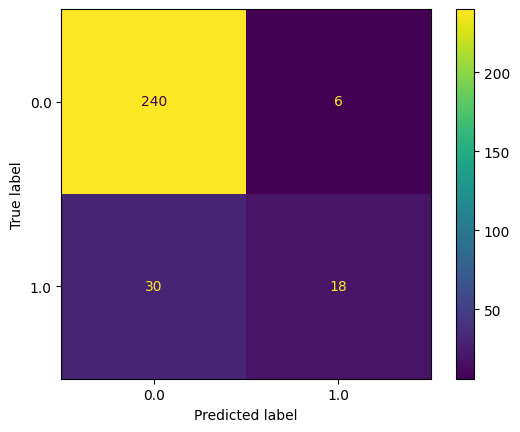

In [406]:
# Calcula las matriz de confusión y las métricas de evaluación con el conjunto de prueba
lrcInicial_model.fit(X_train, y_train) # No se ha entrenado el modelo
print("Exactitud de validacion=",lrcInicial_model.score(X_validation, y_validation))
print("Exactitud de test=",lrcInicial_model.score(X_test, y_test))
print("-----------")

ConfusionMatrixDisplay.from_estimator(lrcInicial_model, X_test, y_test)
print(classification_report(y_test, lrcInicial_model.predict(X_test)))

In [407]:
# Determina, entre algunas alternativas, los mejores valores de hiperparámetros
parameters = {'C': np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
                              param_distributions = parameters,
                              return_train_score=True)
lrc_rand.fit(X_train, y_train)

# Despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n", lrc_rand.best_params_)

Mejores hiperparámetros
 {'solver': 'sag', 'C': 11.513953993264458}


In [408]:
lrc_model = lrc_rand.best_estimator_
print("Exactitud de entrenamiento=",lrc_model.score(X_train, y_train))
print("Exactitud de validacion=",lrc_model.score(X_validation, y_validation))
print("Exactitud de test=",lrc_model.score(X_test, y_test))

Exactitud de entrenamiento= 0.8798185941043084
Exactitud de validacion= 0.8401360544217688
Exactitud de test= 0.8843537414965986


**Se concluye que se obtienen mejores resultados con los mejores hiperparámetros que con los de por omisión para el conjunto de test.**

# Bayes Ingenuo Gaussiano

In [409]:
# Utitliza los hiperparámetros por omisión
from sklearn.naive_bayes import GaussianNB

gnbcInicial_model = GaussianNB()
scores = pd.DataFrame(cross_validate(gnbcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# Despliega los score promedio de entrenamiento y validación, así como los resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8188469003020764
score promedio de validación =  0.8005107252298265


,fit_time,score_time,test_score,train_score
0,0.009504,0.007864,0.764045,0.815889
1,0.004715,0.003145,0.786517,0.828499
2,0.004307,0.002998,0.738636,0.782116
3,0.004432,0.003353,0.784091,0.819899
4,0.004235,0.003036,0.897727,0.836272
5,0.004158,0.002995,0.784091,0.823678
6,0.004156,0.002841,0.806818,0.812343
7,0.006798,0.003562,0.772727,0.827456
8,0.004851,0.002768,0.829545,0.832494
9,0.004171,0.002880,0.840909,0.809824


Exactitud de validacion= 0.7925170068027211
Exactitud de test= 0.7993197278911565
-----------
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       246
         1.0       0.42      0.56      0.48        48

    accuracy                           0.80       294
   macro avg       0.66      0.70      0.68       294
weighted avg       0.83      0.80      0.81       294



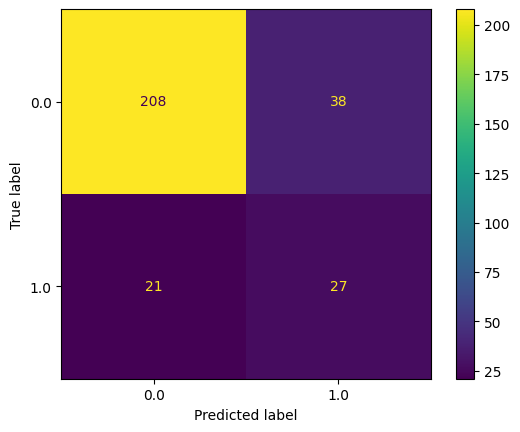

In [410]:
# Calcula las matriz de confusión y las métricas de evaluación con el conjunto de prueba
gnbcInicial_model.fit(X_train, y_train) # No se ha entrenado el modelo

print("Exactitud de validacion=",gnbcInicial_model.score(X_validation, y_validation))
print("Exactitud de test=",gnbcInicial_model.score(X_test, y_test))
print("-----------")

ConfusionMatrixDisplay.from_estimator(gnbcInicial_model, X_test, y_test)
print(classification_report(y_test, gnbcInicial_model.predict(X_test)))

In [411]:
# Determina, entre algunas alternativas, los mejores valores de hiperparámetros
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
gnbc_grid = GridSearchCV(estimator=GaussianNB(), param_grid=parameters, verbose=1,
                     return_train_score=True)

gnbc_grid.fit(X_train, y_train)

# Despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n", gnbc_grid.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros
 {'var_smoothing': 0.1873817422860384}


In [412]:
gnbc_model = gnbc_grid.best_estimator_
print("Exactitud de entrenamiento=",gnbc_model.score(X_train, y_train))
print("Exactitud de validacion=",gnbc_model.score(X_validation, y_validation))
print("Exactitud de test=",gnbc_model.score(X_test, y_test))

Exactitud de entrenamiento= 0.8616780045351474
Exactitud de validacion= 0.8435374149659864
Exactitud de test= 0.8537414965986394


**Se concluye que se obtienen mejores resultados con los mejores hiperparámetros que por los de omisión para el conjunto de test.**

# Máquina de Vectores de Soporte

In [413]:
# Utitliza los hiperparámetros por omisión
from sklearn.svm import SVC

svmcInicial_model = SVC()
scores = pd.DataFrame(cross_validate(svmcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# Despliega los score promedio de entrenamiento y validación, así como los resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.9014856061063272
score promedio de validación =  0.854864657814096


,fit_time,score_time,test_score,train_score
0,0.043149,0.008708,0.865169,0.891551
1,0.039381,0.009082,0.853933,0.904161
2,0.040041,0.009179,0.852273,0.901763
3,0.044309,0.012068,0.852273,0.909320
4,0.055125,0.010618,0.863636,0.890428
5,0.042195,0.008570,0.840909,0.901763
6,0.024804,0.005173,0.840909,0.909320
7,0.025015,0.005170,0.852273,0.913098
8,0.026663,0.005079,0.863636,0.892947
9,0.023996,0.005154,0.863636,0.900504


Exactitud de validacion= 0.8639455782312925
Exactitud de test= 0.8503401360544217
-----------
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       246
         1.0       0.83      0.10      0.19        48

    accuracy                           0.85       294
   macro avg       0.84      0.55      0.55       294
weighted avg       0.85      0.85      0.80       294



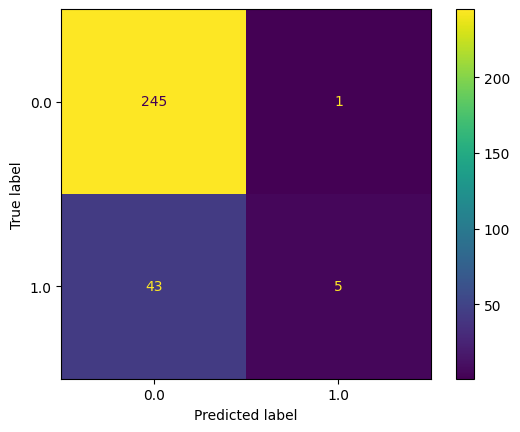

In [414]:
# Calcula las matriz de confusión y las métricas de evaluación con el conjunto de prueba
svmcInicial_model.fit(X_train, y_train) # No se ha entrenado el modelo

print("Exactitud de validacion=",svmcInicial_model.score(X_validation, y_validation))
print("Exactitud de test=",svmcInicial_model.score(X_test, y_test))
print("-----------")

ConfusionMatrixDisplay.from_estimator(svmcInicial_model, X_test, y_test)
print(classification_report(y_test, svmcInicial_model.predict(X_test)))

In [415]:
# Determina, entre algunas alternativas, los mejores valores de hiperparámetros
parameters = {'C': [0.01, 0.1, 1, 10, 50],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters,
                         return_train_score=True)
svmc_grid.fit(X_train, y_train)
print("Mejores hiperparámetros\n",svmc_grid.best_params_)

Mejores hiperparámetros
 {'C': 10, 'kernel': 'linear'}


In [416]:
svmc_model = svmc_grid.best_estimator_
print("Exactitud de entrenamiento=",svmc_model.score(X_train, y_train))
print("Exactitud de validacion=",svmc_model.score(X_validation, y_validation))
print("Exactitud de test=",svmc_model.score(X_test, y_test))

Exactitud de entrenamiento= 0.8877551020408163
Exactitud de validacion= 0.8333333333333334
Exactitud de test= 0.8843537414965986


**Se concluye que se obtienen mejores resultados con los mejores hiperparámetros que por los de omisión para el conjunto de test.**


# Mejor Modelo de Aprendizaje mediante Curva ROC

<Figure size 640x480 with 0 Axes>

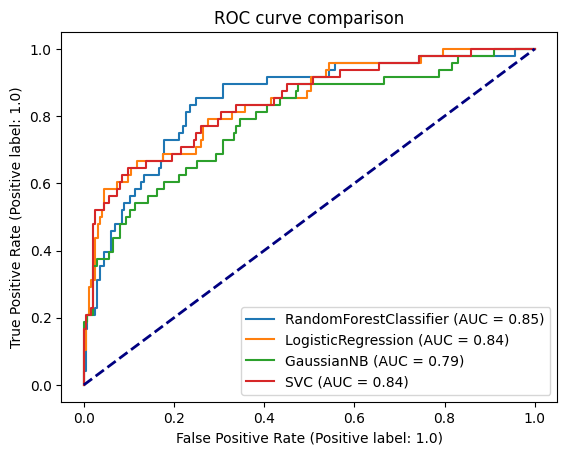

In [417]:
# Calcular y mostrar las curvas ROC de cada modelo de aprendizaje y sus métricas de área bajo la curva (AUC)
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

## **Conclusión: El modelo de Bosque Aleatorio fue el mejor con un AUC de 0.85**